In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/sgeinitz/CS3120/refs/heads/main/lab2_data_ames_housing.csv')
print(f"** df has {df.shape[0]} rows and {df.shape[1]} columns **")
df.describe()

** df has 1460 rows and 81 columns **


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
# Adjust this path to the correct file location
data_path = 'https://raw.githubusercontent.com/sgeinitz/CS3120/refs/heads/main/lab2_data_ames_housing.csv'  # Update this with the exact file path from Kaggle
try:
    data = pd.read_csv(data_path)
except FileNotFoundError:
    print(f"File not found at {data_path}. Please verify the dataset path.")


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Dataset Preview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


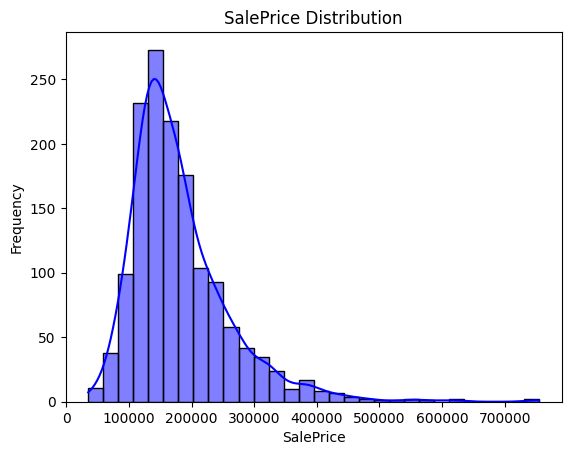

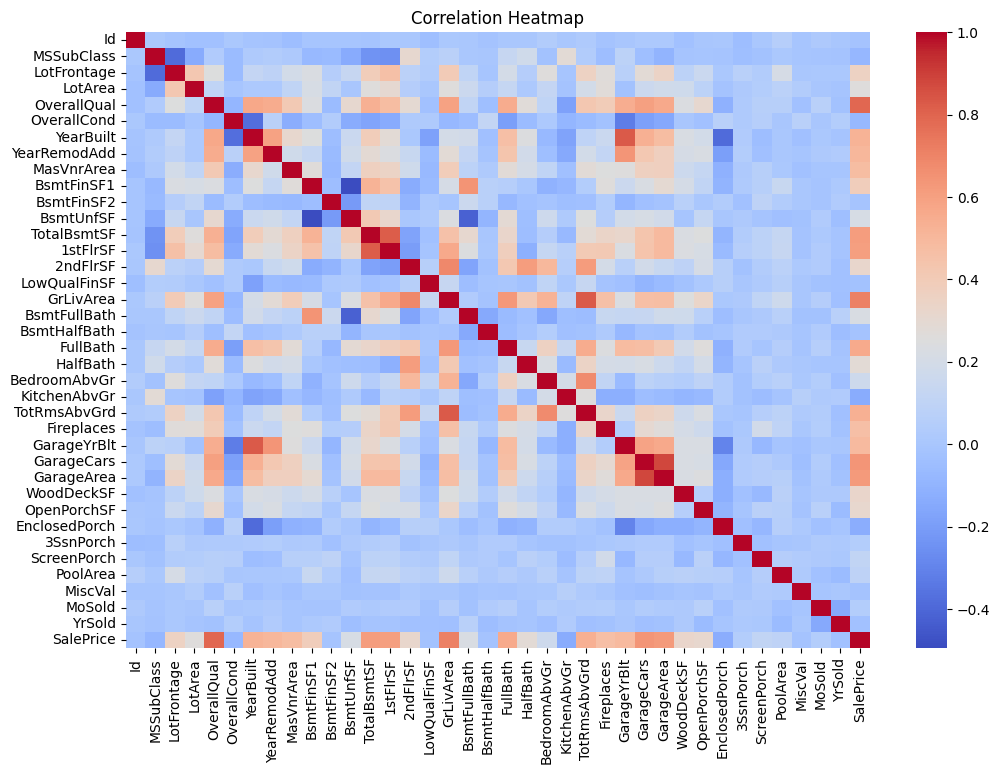


Features Highly Correlated with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


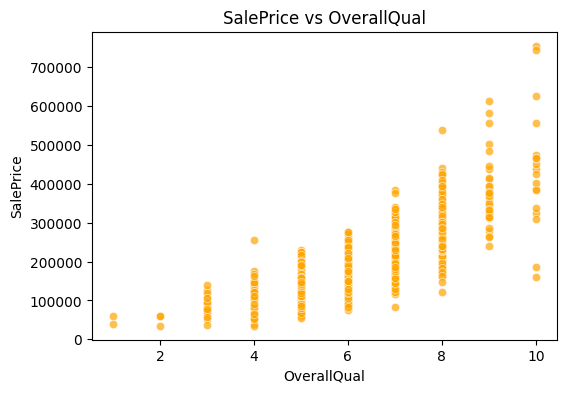

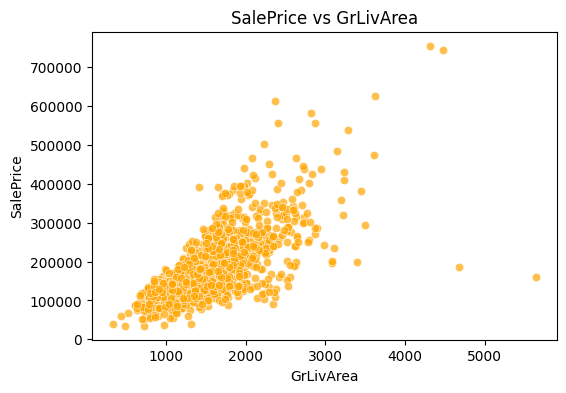

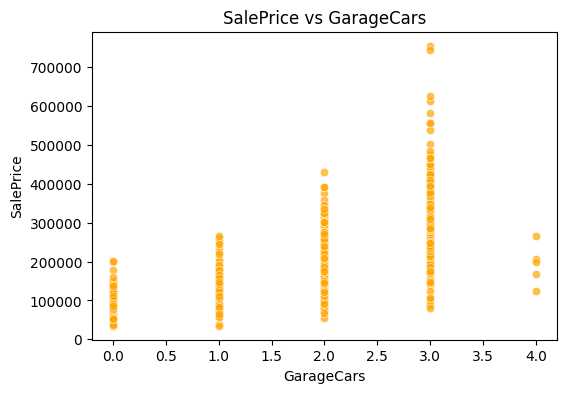

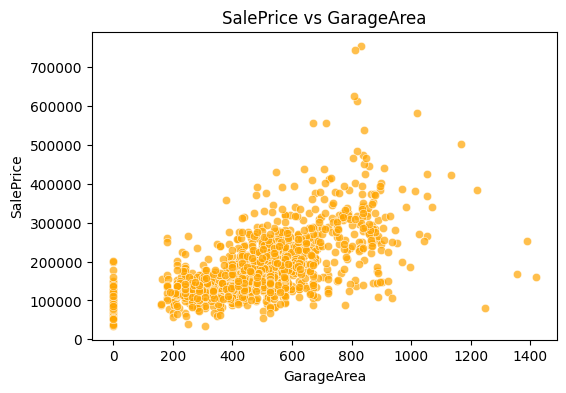

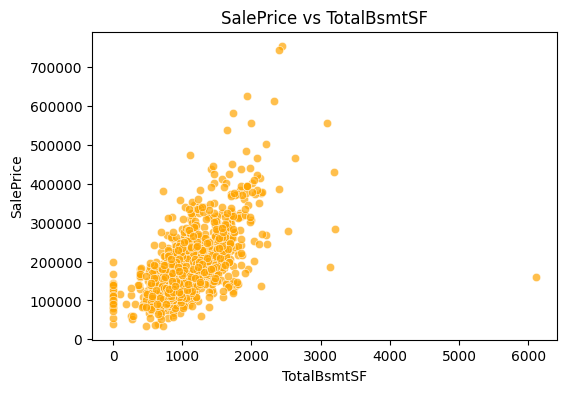

/tmp/ipykernel_30/278628544.py:59: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
/tmp/ipykernel_30/278628544.py:57: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 


Missing Values After Imputation:
0


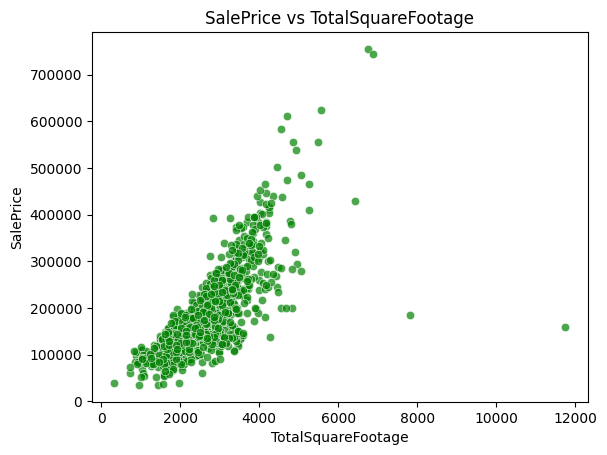

Cleaned dataset saved to /kaggle/working/cleaned_ames_housing.csv


In [6]:
# Load the Ames Housing dataset
data_path = 'https://raw.githubusercontent.com/sgeinitz/CS3120/refs/heads/main/lab2_data_ames_housing.csv'  # Adjust the path based on the dataset's location
data = pd.read_csv(data_path)

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Basic dataset information
print("\nDataset Information:")
print(data.info())

# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))

# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Target variable analysis (SalePrice)
print("\nSalePrice Analysis:")
print(data['SalePrice'].describe())
sns.histplot(data['SalePrice'], kde=True, bins=30, color='blue')
plt.title('SalePrice Distribution')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
corr_matrix = data.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Focus on features highly correlated with SalePrice
corr_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nFeatures Highly Correlated with SalePrice:")
print(corr_target.head(10))

# Scatter plots for top features correlated with SalePrice
top_features = corr_target.index[1:6]  # Top 5 features excluding SalePrice itself
for feature in top_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[feature], y=data['SalePrice'], alpha=0.7, color='orange')
    plt.title(f'SalePrice vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

# Handle missing values (simple median/mode imputation)
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            data[column].fillna(data[column].median(), inplace=True)

# Recheck missing values
print("\nMissing Values After Imputation:")
print(data.isnull().sum().sum())

# Feature engineering: Combine related features
# Example: TotalSquareFootage
if 'TotalBsmtSF' in data.columns and 'GrLivArea' in data.columns:
    data['TotalSquareFootage'] = data['TotalBsmtSF'] + data['GrLivArea']

sns.scatterplot(x=data['TotalSquareFootage'], y=data['SalePrice'], alpha=0.7, color='green')
plt.title('SalePrice vs TotalSquareFootage')
plt.xlabel('TotalSquareFootage')
plt.ylabel('SalePrice')
plt.show()

# Save the cleaned and engineered dataset for modeling
cleaned_data_path = '/kaggle/working/cleaned_ames_housing.csv'
data.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved to {cleaned_data_path}")

Dataset Preview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

/tmp/ipykernel_30/2571247904.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)
/tmp/ipykernel_30/2571247904.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

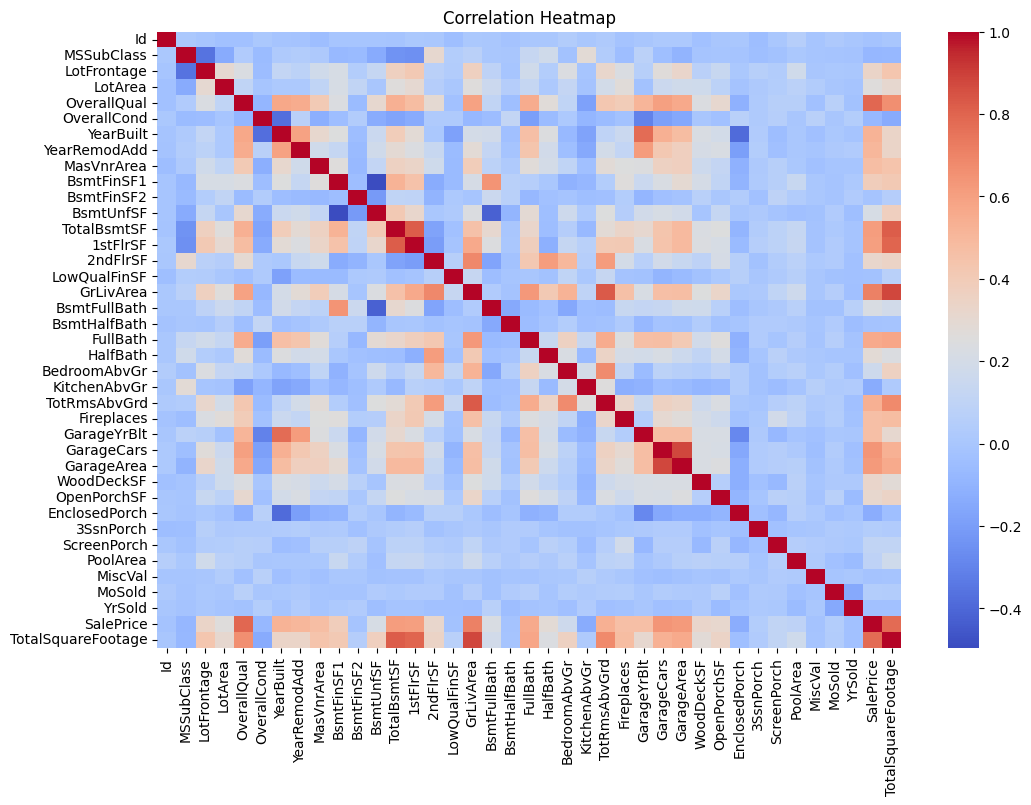


Features Highly Correlated with SalePrice:
SalePrice             1.000000
OverallQual           0.790982
TotalSquareFootage    0.778959
GrLivArea             0.708624
GarageCars            0.640409
GarageArea            0.623431
TotalBsmtSF           0.613581
1stFlrSF              0.605852
FullBath              0.560664
TotRmsAbvGrd          0.533723
Name: SalePrice, dtype: float64


MODELING RESULTS:


Linear Regression Results:
RMSE: 39763.30
R^2 Score: 0.79

PCA + KNN Results:
RMSE: 34002.03
R^2 Score: 0.85

KNN Results:
RMSE: 34699.63
R^2 Score: 0.84

LDA + KNN Results:
RMSE: 33836.81
R^2 Score: 0.85
Cleaned dataset saved to /kaggle/working/cleaned_ames_housing.csv



Cleaned dataset and other information/data used in the modeling:
 <bound method NDFrame.to_csv of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave  Grvl      Reg   
1        2          20       RL         80.0     9600   Pave  

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Ames Housing dataset
data_path = 'https://raw.githubusercontent.com/sgeinitz/CS3120/refs/heads/main/lab2_data_ames_housing.csv'
data = pd.read_csv(data_path)

# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Handle missing values (simple median/mode imputation)
for column in data.columns:
    if data[column].isnull().sum() > 0:
        if data[column].dtype == 'object':
            data[column].fillna(data[column].mode()[0], inplace=True)
        else:
            data[column].fillna(data[column].median(), inplace=True)

# Feature engineering: Combine related features
data['TotalSquareFootage'] = data['TotalBsmtSF'] + data['GrLivArea']

# Select numerical features for analysis
numerical_features = data.select_dtypes(include=[np.number])

# Correlation analysis
corr_matrix = numerical_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Focus on features highly correlated with SalePrice
corr_target = corr_matrix['SalePrice'].sort_values(ascending=False)
print("\nFeatures Highly Correlated with SalePrice:")
print(corr_target.head(10))

# Prepare data for modeling
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalSquareFootage', 'YearBuilt']
X = data[selected_features]
y = data['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Baseline model: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions and evaluation for Linear Regression
y_pred_lr = lr_model.predict(X_test_scaled)
print("\n\nMODELING RESULTS:\n")
print("\nLinear Regression Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lr)):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lr):.2f}")

# Advanced model 1: PCA + KNN
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_model_pca = KNeighborsRegressor(n_neighbors=5)
knn_model_pca.fit(X_train_pca, y_train)

# Predictions and evaluation for PCA + KNN
y_pred_knn_pca = knn_model_pca.predict(X_test_pca)
print("\nPCA + KNN Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn_pca)):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_knn_pca):.2f}")

# Advanced model 2: KNN without PCA
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Predictions and evaluation for KNN without PCA
y_pred_knn = knn_model.predict(X_test_scaled)
print("\nKNN Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_knn)):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_knn):.2f}")

# Advanced model 3: LDA
binned_prices = pd.qcut(y_train, q=3, labels=[0, 1, 2])
lda = LDA()
X_train_lda = lda.fit_transform(X_train_scaled, binned_prices)
X_test_lda = lda.transform(X_test_scaled)

lda_model = KNeighborsRegressor(n_neighbors=5)
lda_model.fit(X_train_lda, y_train)

# Predictions and evaluation for LDA
y_pred_lda = lda_model.predict(X_test_lda)
print("\nLDA + KNN Results:")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lda)):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred_lda):.2f}")

# Save cleaned and transformed dataset for modeling
cleaned_data_path = '/kaggle/working/cleaned_ames_housing.csv'
data.to_csv(cleaned_data_path, index=False)
print(f"Cleaned dataset saved to {cleaned_data_path}")
print("\n\n\nCleaned dataset and other information/data used in the modeling:\n",data.to_csv)

# Show bins for LDA
binned_prices = pd.qcut(y_train, q=3, labels=[0, 1, 2])
print("\nBinned Prices for LDA\n(0-low, 1-medium, and 2-high prices)\n", binned_prices)

In [8]:
# Display the components and their corresponding feature weights
pca_loadings = pd.DataFrame(pca.components_, columns=selected_features, index=['PC1', 'PC2', 'PC3'])
print(pca_loadings)


     OverallQual  GrLivArea  GarageCars  TotalSquareFootage  YearBuilt
PC1     0.484716   0.457147    0.439161            0.494988   0.343790
PC2    -0.132704   0.523203   -0.272425            0.376101  -0.702126
PC3    -0.377968  -0.037532    0.850950           -0.110103  -0.345677
